# Assignment 2. 캐글 경진대회 참여
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew 

In [2]:
test = pd.read_csv('test_new.csv') 
train = pd.read_csv('train_new.csv') 

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,856,20,RL,NaN,6897,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.751950
856,857,80,RL,NaN,10970,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,11.898195
857,858,60,RL,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,12.066816
858,859,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Family,11.931642


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal
1,862,190,RL,75.0,11625,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
2,863,20,RL,81.0,9672,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,5,2010,WD,Normal
3,864,20,RL,70.0,7931,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,7,2009,WD,Normal
4,865,20,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,New,Partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
596,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
597,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
598,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [5]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (860, 81) 
The test data size before dropping Id feature is : (600, 80) 

The train data size after dropping Id feature is : (860, 80) 
The test data size after dropping Id feature is : (600, 79) 


# <span style="color:blue"> Data Processing 전처리 같이 해봅시다

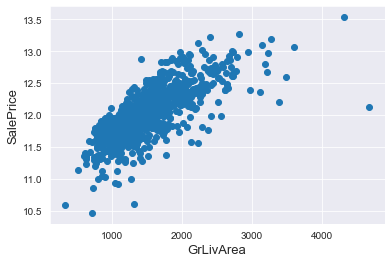

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

**Q1. 위 그림에서 이상치로 판단되는 데이터를 제거하시오.**

**사람마다 기준은 다르나 저는 오른쪽 따로노는 아이가 이상하군요....?**

In [7]:
train.query('GrLivArea > 4500')
# GrLivArea가 4500이상인 하나의 이상치를 출력해보자

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,12.126764


In [8]:
train.shape
#제거하기 이전의 차원을 확인하고 

(860, 80)

In [9]:
train.drop(523, inplace=True)
#위에서 확인한 인덱스를 이용해 제거합시다

In [10]:
train.shape
#오호! row 하나가 제거되었네요 큼큼 ^^

(859, 80)

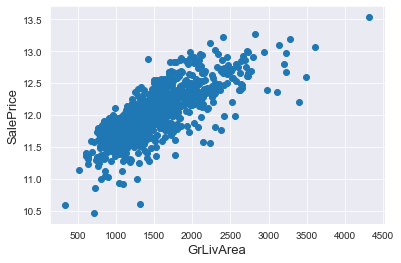

In [11]:
#Deleting outliers
# train = ---Q1----- 위에서 제거하였습니다

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Features engineering

In [12]:
ntrain = train.shape[0] #859
ntest = test.shape[0] #600
y_train = train.SalePrice.values #train 데이터의 target variable 분류
all_data = pd.concat((train, test)).reset_index(drop=True) #두 데이터를 합치고 index를 재설정
all_data.drop(['SalePrice'], axis=1, inplace=True) #데이터에서 SalePrice를 분리
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1459, 79)


### Missing Data

In [13]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100 #Missing ratio 계산
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30] #Missing ratio가 0인 애들 drop하고 내림차순 정렬
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na}) #Data Frame 형태로 출력
missing_data.head(20)

,Missing Ratio
PoolQC,99.520219
MiscFeature,96.298835
Alley,93.762851
Fence,80.740233
FireplaceQu,47.292666
LotFrontage,17.751885
GarageYrBlt,5.551748
GarageType,5.551748
GarageFinish,5.551748
GarageQual,5.551748


Text(0.5, 1.0, 'Percent missing data by feature')

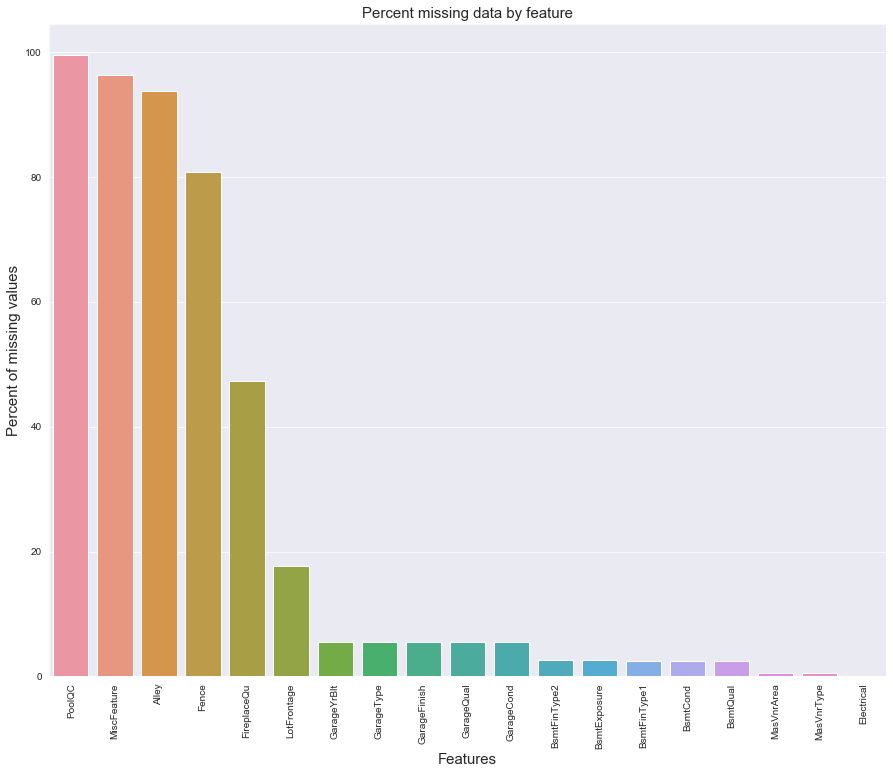

In [14]:
#결측치 상태를 bar plot으로 확인
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

**Data Correlation**


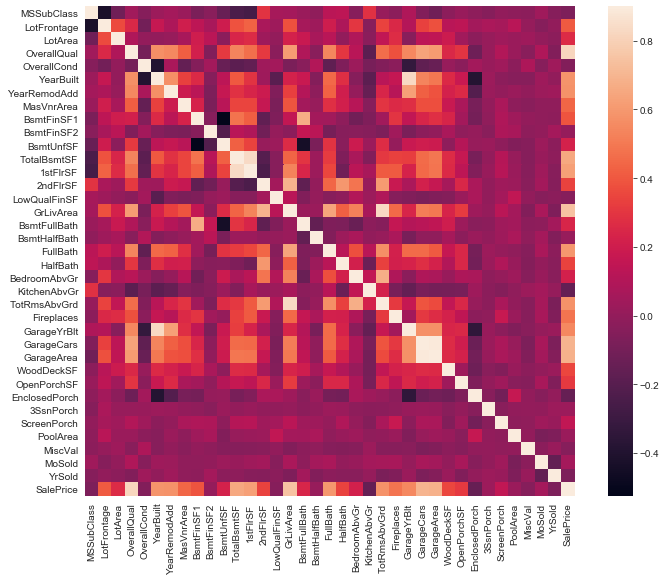

In [15]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Imputing missing values 

**Q3.결측치를 None으로 바꿔봅시다**  
**그냥 바꾸지만 마시고 왜 None으로 바꾸는지 한번 생각해보세요**

- **PoolQC** : data description says NA means "No  Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general. 

In [16]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
#결측치 보다는 수영장이 '없다'라는 의미로 해석될 수 있도록 "None"을 채워줍시다!!

- **MiscFeature** : data description says NA means "no misc feature"


In [17]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

- **Alley** : data description says NA means "no alley access"

In [18]:
all_data["Alley"] = all_data["Alley"].fillna("None")

- **Fence** : data description says NA means "no fence"

In [19]:
all_data["Fence"] = all_data["Fence"].fillna("None")

- **FireplaceQu** : data description says NA means "no fireplace"

In [20]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [21]:
all_data.head()
#결측치들이 None으로 잘 바뀌었네요!

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal


- **LotFrontage** : 

 **Q4. the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood. 인 변수입니다. 그러면 결측치를 어떻게 바꾸는게 좋을까요?**
 ==> 면적이 이웃의 집들과 비슷할 것이라고 하니 이웃의 평균을 내어 대체하는 것이 좋겠네요!!

In [22]:
all_data[{"LotFrontage", "Neighborhood"}]

,LotFrontage,Neighborhood
0,65.0,CollgCr
1,80.0,Veenker
2,68.0,CollgCr
3,60.0,Crawfor
4,84.0,NoRidge
...,...,...
1454,62.0,Gilbert
1455,85.0,NWAmes
1456,66.0,Crawfor
1457,68.0,NAmes


In [23]:
all_data[{"LotFrontage", "Neighborhood"}].groupby('Neighborhood').mean()

,LotFrontage
Neighborhood,
Blmngtn,47.142857
Blueste,24.000000
BrDale,21.562500
BrkSide,57.509804
ClearCr,83.461538
CollgCr,71.682540
Crawfor,71.804878
Edwards,67.538462
Gilbert,79.877551


In [24]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.mean()))
#그룹의 평균 값으로 대치하였습니다

In [25]:
all_data["LotFrontage"].isnull().sum()
#결측치가 모두 없어졌습니다!!

0

- **Q5. GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None

In [26]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna("None")

- **Q6. GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)


In [27]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

- **Q7. BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [28]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [29]:
all_data[{'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'}]

,TotalBsmtSF,BsmtFinSF2,BsmtUnfSF,BsmtHalfBath,BsmtFullBath,BsmtFinSF1
0,856,0,150,0,1,706
1,1262,0,284,1,0,978
2,920,0,434,0,1,486
3,756,0,540,0,1,216
4,1145,0,490,0,1,655
...,...,...,...,...,...,...
1454,953,0,953,0,0,0
1455,1542,163,589,0,1,790
1456,1152,0,877,0,0,275
1457,1078,1029,0,0,1,49


- **Q8. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no  basement.


In [30]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna("None")

In [31]:
all_data[{'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'}]

,BsmtCond,BsmtFinType1,BsmtExposure,BsmtQual,BsmtFinType2
0,TA,GLQ,No,Gd,Unf
1,TA,ALQ,Gd,Gd,Unf
2,TA,GLQ,Mn,Gd,Unf
3,Gd,ALQ,No,TA,Unf
4,TA,GLQ,Av,Gd,Unf
...,...,...,...,...,...
1454,TA,Unf,No,Gd,Unf
1455,TA,ALQ,No,Gd,Rec
1456,Gd,GLQ,No,TA,Unf
1457,TA,GLQ,Mn,TA,Rec


- **Q9. MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type. 


In [32]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

- **MSZoning (The general zoning classification)** :  'RL' is by far  the most common value.  So we can fill in missing values with 'RL'  

**Q10. MSZoning에서 가장 많이 존재하는 값으로 결측치를 대체하세요**

In [33]:
all_data["MSZoning"].value_counts()

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [34]:
all_data['MSZoning'] = all_data['MSZoning'].fillna("RL")

In [35]:
all_data["MSZoning"].value_counts()
#값이 바뀌지 않은 것 같아 보니 원래 결측치가 없었던 것 같은데요!

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

- **Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa"  and 2 NA . Since the house with 'NoSewa' is in the training set, **this feature won't help in predictive modelling**. We can then safely  remove it.


In [36]:
all_data['Utilities'].value_counts()

AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64

In [37]:
all_data = all_data.drop(['Utilities'], axis=1)
#Utilities 자체를 삭제함. 왜냐? 도움이 안됨.

- **Functional** : data description says NA means typical

In [38]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

- **Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.


**Q11.  가장 많이 존재하는 값으로 결측치를 대체하세요**

In [39]:
all_data['Electrical'].value_counts()

SBrkr    1333
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [40]:
all_data['Electrical'].isnull().sum()
#결측치가 한 개 있습니다 이를 가장 많이 존재하는 값 Sbrkr로 바꿔봅시다

1

In [41]:
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr")

- **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent)  for the missing value in KitchenQual.


In [42]:
all_data['KitchenQual'].value_counts()

TA    735
Gd    586
Ex     99
Fa     39
Name: KitchenQual, dtype: int64

In [43]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA")

- **Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [44]:
all_data['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     60
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

In [45]:
all_data['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     59
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [46]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna("VinylSd")
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna("VinylSd")

- **SaleType** : Fill in again with most frequent which is "WD"

In [47]:
all_data['SaleType'] = all_data['SaleType'].fillna("WD")

- **MSSubClass** : Na most likely means No building class. We can replace missing values with None


In [48]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Is there any remaining missing value ? 

In [49]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()
#모든 결측치를 다 해결했다~~~~~~!!!

,Missing Ratio


### More features engeneering

**Transforming some numerical variables that are really categorical**   

숫자형태를 한 값일 뿐 실제 연속형도 숫자 데이터도 아니죠? 따라서 문자형식으로 바꾼후 라벨링 인코더 하겠습니다.

**Q12. 데이터를 문자형으로 바꾸세요.**

In [50]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
type(all_data['MSSubClass'][0]) #str로 변경!

str

In [51]:
all_data['OverallCond'].value_counts()

5    820
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [52]:
#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

**Label Encoding some categorical variables that may contain information in their ordering set** 

**Q13. LabelEncoder로 해당 범주형 데이터를 바꿔보세요..**

In [53]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

encoder = LabelEncoder()

for i in cols:
    all_data[i] = encoder.fit_transform(all_data[i])

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (1459, 78)


In [54]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,9,RL,65.0,8450,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,4,2,WD,Normal
1,4,RL,80.0,9600,1,1,3,Lvl,FR2,0,...,0,0,3,4,None,0,7,1,WD,Normal
2,9,RL,68.0,11250,1,1,0,Lvl,Inside,0,...,0,0,3,4,None,0,11,2,WD,Normal
3,10,RL,60.0,9550,1,1,0,Lvl,Corner,0,...,0,0,3,4,None,0,4,0,WD,Abnorml
4,9,RL,84.0,14260,1,1,0,Lvl,FR2,0,...,0,0,3,4,None,0,3,2,WD,Normal


**Adding one more important feature**

In [55]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

**Skewed features**

In [56]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.443278
PoolArea,14.807992
LotArea,12.290047
3SsnPorch,10.290132
LowQualFinSF,8.998885
LandSlope,4.806884
KitchenAbvGr,4.482026
BsmtFinSF2,4.249219
ScreenPorch,4.116334
BsmtHalfBath,4.097541


**Box Cox Transformation of (highly) skewed features**

We use the scipy  function boxcox1p which computes the Box-Cox transformation of **\\(1 + x\\)**. 

Note that setting \\( \lambda = 0 \\) is equivalent to log1p used above for the target variable.  

See [this page][1] for more details on Box Cox Transformation as well as [the scipy function's page][2]
[1]: http://onlinestatbook.com/2/transformations/box-cox.html
[2]: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html

In [57]:
skewness = skewness[abs(skewness) > 0.75]


from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

**Getting dummy categorical features**

**Q14. 더미화하세요.**

In [58]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(1459, 221)


Getting the new train and test sets. 

In [59]:
train = all_data[:ntrain]
test = all_data[ntrain:]
#다시 데이터를 train, test로 나눈다. train에 대한 예측값은 y_

# Modelling

**Import librairies**

In [60]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
import lightgbm as lgb

**Define a cross validation strategy**

We use the **cross_val_score** function of Sklearn. However this function has not a shuffle attribut, we add then one line of code,  in order to shuffle the dataset  prior to cross-validation

In [61]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Gradient Boost

### 1. Default Score : 0.1312

In [62]:
gbrt = GradientBoostingRegressor(random_state = 77)
gbrt.fit(train, y_train)
score = rmsle_cv(gbrt)
print("\nGradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#아무리 그래도 디폴트보단 잘 나와야지!


GradientBoosting score: 0.1312 (0.0114)



### 2. Users Score : 0.1282 (max_depth = 2, n_estimators = 200, learning_rate = 0.1)

In [87]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state = 77)
gbrt.fit(train, y_train)
score = rmsle_cv(gbrt)
print("\nGradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#대박~~~! 괜찮은걸? 


GradientBoosting score: 0.1282 (0.0115)



#### 파라미터 튜닝을 해 봅시다!

In [64]:
gbrt_p = {'max_depth' : list(range(1, 11)), 'n_estimators' :  list(range(10, 1000, 100))}
gbrt_grid = GridSearchCV(GradientBoostingRegressor(), gbrt_p, cv=5, verbose=True, n_jobs=-1)
gbrt_result = gbrt_grid.fit(train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.5min finished


In [65]:
gbrt_grid.best_params_

{'max_depth': 1, 'n_estimators': 910}

### 3. Tune1 Score : 0.1260 (max_depth = 1, n_estimators = 910)

In [194]:
gbrt1 = GradientBoostingRegressor(max_depth=1, n_estimators=910, random_state = 77)
gbrt1.fit(train, y_train)
score = rmsle_cv(gbrt1)
print("\nGradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GradientBoosting score: 0.1260 (0.0104)



#### 다시! 이번엔 Learning rate 값을 건드려봅시다

In [84]:
gbrt_p = {'max_depth' : list(range(1, 11)), 'learning_rate' : [0.0001, 0.001, 0.01, 0.1]}
gbrt_grid = GridSearchCV(GradientBoostingRegressor(), gbrt_p, cv=5, verbose=True, n_jobs=-1)
gbrt_result = gbrt_grid.fit(train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   35.1s finished


In [85]:
gbrt_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3}

### 4. Tune2 Socre : 0.1310 (max_depth = 3, n_estimators = 910, learning_rate = 0.1)   점점 더 멀어져 간다.....

In [91]:
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=910, learning_rate=0.1, random_state = 77)
gbrt.fit(train, y_train)
score = rmsle_cv(gbrt)
print("\nGradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GradientBoosting score: 0.1310 (0.0104)



In [97]:
gbrt_p = {'max_depth' : [1, 2, 3, 4, 5], 'learning_rate' : [0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]}
gbrt_grid = GridSearchCV(GradientBoostingRegressor(), gbrt_p, cv=5, verbose=True, n_jobs=-1)
gbrt_result = gbrt_grid.fit(train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   23.5s finished


In [98]:
gbrt_grid.best_params_

{'learning_rate': 0.09, 'max_depth': 3}

### 5. Tune3 Score : 0.1305 (max_depth = 3, n_estimators = 900, learning_rate = 0.09) garbage ..

In [100]:
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=900, learning_rate=0.09, random_state = 77)
gbrt.fit(train, y_train)
score = rmsle_cv(gbrt)
print("\nGradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GradientBoosting score: 0.1305 (0.0108)



#### [결론] Gradient Boost 에서는 희망이 없다

# RandomForest

### 1. Default Score : 0.1457

In [74]:
Rfr= RandomForestRegressor()
Rfr.fit(train, y_train)
score = rmsle_cv(Rfr)
print("\nRandomForestRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RandomForestRegressor score: 0.1457 (0.0113)



### 2. Users Score : 0.1458 (n_estimators = 100)

In [107]:
Rfr= RandomForestRegressor(n_estimators = 100)
Rfr.fit(train, y_train)
score = rmsle_cv(Rfr)
print("\nRandomForestRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RandomForestRegressor score: 0.1458 (0.0111)



#### [결론]: 랜덤 포레스트에도 희망이 없다

## Base models

### LASSO  Regression

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's  **Robustscaler()**  method on pipeline 

In [117]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1166 (0.0120)



#### Lasso값이 제일 잘 나오니 조금 튜닝해볼까?

In [143]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.00077, random_state=77))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1161 (0.0115)



In [226]:
lasso1 = make_pipeline(RobustScaler(), Lasso(alpha =0.00077, random_state=77, max_iter = 87))
score = rmsle_cv(lasso1)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1161 (0.0113)



### Elastic Net Regression

again made robust to outliers

In [116]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1170 (0.0121)



#### 이 친구도 라쏘값과 비슷하다

In [151]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00085, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1161 (0.0115)



### Kernel Ridge Regression

In [168]:
KRR = KernelRidge(alpha=1.0, degree=3)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1276 (0.0136)



### XGBoost

In [122]:
model_xgb = xgb.XGBRegressor(n_estimators = 500, learning_rate = 0.1, max_depth = 10)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[03:14:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost score: 0.1385 (0.0083)



### LightGBM

In [235]:
model_lgb = lgb.LGBMRegressor(learning_rate = 0.1, max_depth = 2)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1328 (0.0127)



이것저것 조정해보았지만 큰 수확은 없었다.

## Stacking  models

### Simplest Stacking approach : Averaging base models

**Averaged base models class**

In [174]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

**Averaged base models score**

In [204]:
averaged_models = AveragingModels(models = (KRR, gbrt1, ENet, lasso))
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#괜찮은 스코어가 나온 것 같아 제출해보았다.

 Averaged base models score: 0.1160 (0.0121)



In [195]:
averaged_models = AveragingModels(models = (lasso, ENet, gbrt1))
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#내가 모델링해서 얻은 결과 중 잘나온 것들 TOP3로 스택킹 해보았다.
#가장 값이 잘 나와서 제출해보았으나 순위에는 변동이 없었다 ㅜ

 Averaged base models score: 0.1153 (0.0116)



**Ensemble prediction:**

In [196]:
#그나마 결과가 좋은 위에 것으로 submmit했다.
averaged_models.fit(train, y_train)
ensemble = averaged_models.predict(test)

**Submission**

In [199]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission1.csv',index=False)